In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pmdarima.model_selection import train_test_split
plt.rcParams["figure.figsize"] = (15,7)

# Data

In [2]:
import pmdarima as pm
# Load/split your data
y = pm.datasets.load_wineind()

train, test = train_test_split(y, train_size=150)

[15136. 16733. 20016. 17708. 18019. 19227. 22893. 23739. 21133. 22591.
 26786. 29740. 15028. 17977. 20008. 21354. 19498. 22125. 25817. 28779.
 20960. 22254. 27392. 29945. 16933. 17892. 20533. 23569. 22417. 22084.
 26580. 27454. 24081. 23451. 28991. 31386. 16896. 20045. 23471. 21747.
 25621. 23859. 25500. 30998. 24475. 23145. 29701. 34365. 17556. 22077.
 25702. 22214. 26886. 23191. 27831. 35406. 23195. 25110. 30009. 36242.
 18450. 21845. 26488. 22394. 28057. 25451. 24872. 33424. 24052. 28449.
 33533. 37351. 19969. 21701. 26249. 24493. 24603. 26485. 30723. 34569.
 26689. 26157. 32064. 38870. 21337. 19419. 23166. 28286. 24570. 24001.
 33151. 24878. 26804. 28967. 33311. 40226. 20504. 23060. 23562. 27562.
 23940. 24584. 34303. 25517. 23494. 29095. 32903. 34379. 16991. 21109.
 23740. 25552. 21752. 20294. 29009. 25500. 24166. 26960. 31222. 38641.
 14672. 17543. 25453. 32683. 22449. 22316. 27595. 25451. 25421. 25288.
 32568. 35110. 16052. 22146. 21198. 19543. 22084. 23816. 29961. 26773.
 26635

# SARIMA

In [3]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train, order=(2,1,1), seasonal_order=(2,0,0,12))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  150
Model:             ARIMA(2, 1, 1)x(2, 0, [], 12)   Log Likelihood               -1418.496
Date:                           Fri, 05 Nov 2021   AIC                           2848.992
Time:                                   10:05:46   BIC                           2867.016
Sample:                                        0   HQIC                          2856.315
                                           - 150                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0339      0.079     -0.430      0.667      -0.188       0.121
ar.L2         -0.2113      0.094     -2.248

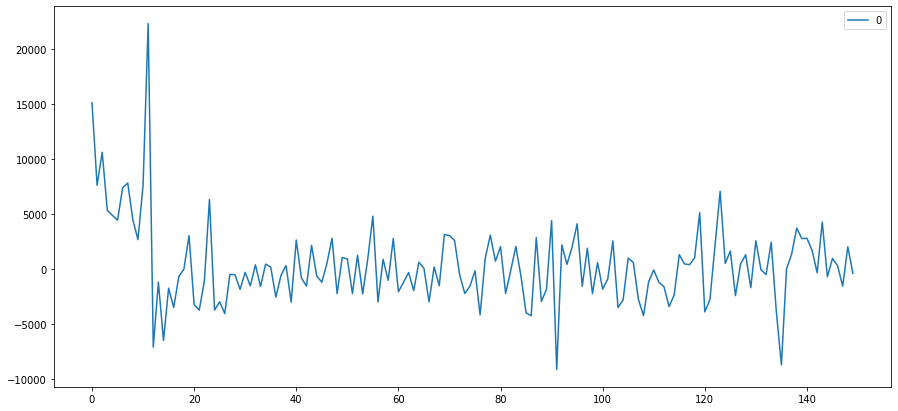

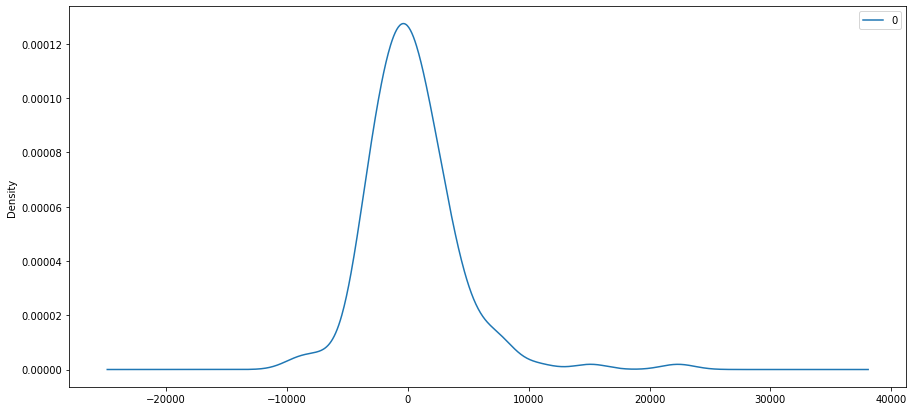

In [4]:
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()

# Auto SARIMA

In [5]:
import statsmodels.api as sm
auto_cor = sm.tsa.acf(train)
# kidobjuk az első értéket mivel az mindig a legmagasabb 
auto_cor = auto_cor[1:]
# hozáadunk 1-et az kidobot első elem miatt 
m = (np.where(auto_cor == np.amax(auto_cor))[0]+1)[0]
print(m)

12


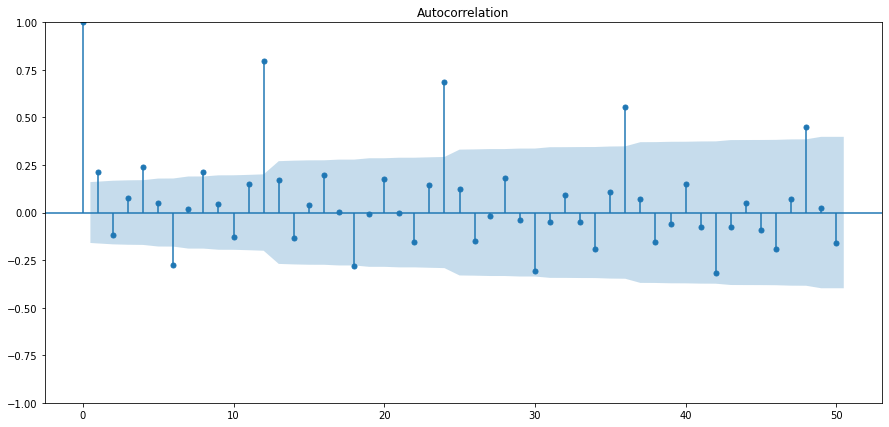

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
# Use the Autocorrelation function
# from the statsmodel library passing
# our DataFrame object in as the data
# Note: Limiting Lags to 50
plot_acf(train, lags=50)
# Show the AR as a plot
plt.show()

In [7]:
# Fit your model
#   m -- ezt tudni kell 
model = pm.auto_arima(train, suppress_warnings=True, trace=True, seasonal=True, m=12)

# make your forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.80 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3049.597, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2895.934, Time=0.62 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2917.891, Time=1.02 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3047.612, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=3039.240, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=2890.929, Time=1.60 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=2892.498, Time=3.28 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=2890.523, Time=1.01 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=2981.524, Time=0.16 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=2892.534, Time=2.22 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=2931.096, Time=1.47 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=4.25 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2906.713, Time=0.56 sec
 ARIMA(2,1,0)(1,0,1)[12] inte

c:\users\attila_sajo\miniconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(4,1,1)(2,0,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "c:\users\attila_sajo\miniconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "c:\users\attila_sajo\miniconda3\lib\site-packages\pmdarima\arima\arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "c:\users\attila_sajo\miniconda3\lib\site-packages\pmdarima\arima\arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "c:\users\attila_sajo\miniconda3\lib\site-packages\pmdarima\arima\arima.py", line 508, in _fit_wrapper
    return arima, arima.fit(start_params=start_params,
  File "c:\users\attila_sajo\miniconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mle

 ARIMA(4,1,1)(2,0,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(4,1,1)(1,0,2)[12]             : AIC=2868.345, Time=3.50 sec
 ARIMA(4,1,1)(0,0,0)[12]             : AIC=2981.429, Time=0.35 sec
 ARIMA(4,1,1)(0,0,2)[12]             : AIC=2886.297, Time=3.15 sec
 ARIMA(4,1,1)(2,0,0)[12]             : AIC=inf, Time=5.66 sec


c:\users\attila_sajo\miniconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(4,1,1)(2,0,2)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "c:\users\attila_sajo\miniconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "c:\users\attila_sajo\miniconda3\lib\site-packages\pmdarima\arima\arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "c:\users\attila_sajo\miniconda3\lib\site-packages\pmdarima\arima\arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "c:\users\attila_sajo\miniconda3\lib\site-packages\pmdarima\arima\arima.py", line 508, in _fit_wrapper
    return arima, arima.fit(start_params=start_params,
  File "c:\users\attila_sajo\miniconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mle

 ARIMA(4,1,1)(2,0,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(3,1,1)(1,0,1)[12]             : AIC=2851.425, Time=1.77 sec
 ARIMA(3,1,1)(0,0,1)[12]             : AIC=2914.351, Time=1.27 sec
 ARIMA(3,1,1)(1,0,0)[12]             : AIC=inf, Time=1.34 sec
 ARIMA(3,1,1)(2,0,1)[12]             : AIC=2852.783, Time=3.50 sec
 ARIMA(3,1,1)(1,0,2)[12]             : AIC=2853.379, Time=4.01 sec
 ARIMA(3,1,1)(0,0,0)[12]             : AIC=2981.580, Time=0.24 sec
 ARIMA(3,1,1)(0,0,2)[12]             : AIC=2885.496, Time=2.92 sec
 ARIMA(3,1,1)(2,0,0)[12]             : AIC=2860.812, Time=4.25 sec
 ARIMA(3,1,1)(2,0,2)[12]             : AIC=inf, Time=4.58 sec
 ARIMA(2,1,1)(1,0,1)[12]             : AIC=2849.460, Time=1.33 sec
 ARIMA(2,1,1)(0,0,1)[12]             : AIC=2932.875, Time=0.29 sec
 ARIMA(2,1,1)(1,0,0)[12]             : AIC=2856.086, Time=1.46 sec
 ARIMA(2,1,1)(2,0,1)[12]             : AIC=inf, Time=4.26 sec
 ARIMA(2,1,1)(1,0,2)[12]             : AIC=inf, Time=3.22 sec
 ARIMA(2,1,1)(0,0,0)[

c:\users\attila_sajo\miniconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(3,1,2)(2,0,0)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "c:\users\attila_sajo\miniconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "c:\users\attila_sajo\miniconda3\lib\site-packages\pmdarima\arima\arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "c:\users\attila_sajo\miniconda3\lib\site-packages\pmdarima\arima\arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "c:\users\attila_sajo\miniconda3\lib\site-packages\pmdarima\arima\arima.py", line 508, in _fit_wrapper
    return arima, arima.fit(start_params=start_params,
  File "c:\users\attila_sajo\miniconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mle

 ARIMA(3,1,2)(2,0,0)[12]             : AIC=inf, Time=nan sec
 ARIMA(2,1,1)(2,0,0)[12] intercept   : AIC=2891.289, Time=3.23 sec

Best model:  ARIMA(2,1,1)(2,0,0)[12]          
Total fit time: 208.916 seconds


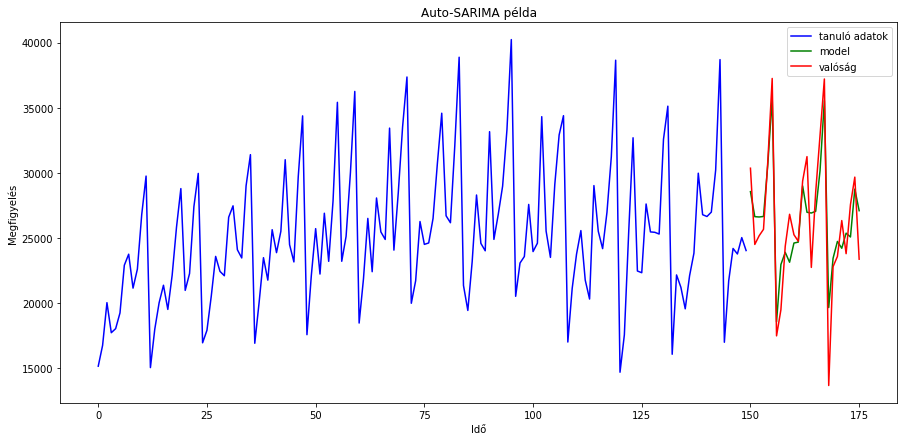

In [8]:
# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(y.shape[0])
plt.plot(x[:150], train, c='blue', label="tanuló adatok")
plt.plot(x[150:], forecasts, c='green', label="model")
plt.plot(x[150:], test, c="red", label="valóság")
plt.legend()
plt.xlabel("Idő")
plt.ylabel("Megfigyelés")
plt.title("Auto-SARIMA példa")
plt.show()

# Grid search

In [9]:
import itertools
import warnings
warnings.filterwarnings("ignore")

def sarima_grid_search(y,seasonal_period):
    p = d = q = range(0, 3)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal
                    
                print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except Exception as e:
                print(e)
                continue
    print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))
    
sarima_grid_search(train, m)

SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:3452.462140939295
SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:3091.030843486723
SARIMA(0, 0, 0)x(0, 0, 2, 12) - AIC:2804.4142056174906
SARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:2555.922451650772
SARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:2332.046692092363
SARIMA(0, 0, 0)x(0, 1, 2, 12) - AIC:2112.2874273215134
SARIMA(0, 0, 0)x(0, 2, 0, 12) - AIC:2453.4107873394214
SARIMA(0, 0, 0)x(0, 2, 1, 12) - AIC:2178.095674842778
SARIMA(0, 0, 0)x(0, 2, 2, 12) - AIC:1932.7280277716752
SARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:2574.027512686272
SARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:2558.504464617662
SARIMA(0, 0, 0)x(1, 0, 2, 12) - AIC:2325.9269628115126
SARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:2344.900672750571
SARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:2326.5116686679376
SARIMA(0, 0, 0)x(1, 1, 2, 12) - AIC:2107.04755132333
SARIMA(0, 0, 0)x(1, 2, 0, 12) - AIC:2178.7546627099996
SARIMA(0, 0, 0)x(1, 2, 1, 12) - AIC:2161.0555310090267
SARIMA(0, 0, 0)x(1, 2, 2, 12) - AIC:1935.5697737170424
SARIMA(0, 0, 0)x(2, 

SARIMA(0, 1, 2)x(1, 2, 1, 12) - AIC:2114.3938866228664
SARIMA(0, 1, 2)x(1, 2, 2, 12) - AIC:1888.163583442869
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:2324.7730568127463
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:2430.5581217121485
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:2268.038728254899
SARIMA(0, 1, 2)x(2, 1, 0, 12) - AIC:2111.9551378798765
SARIMA(0, 1, 2)x(2, 1, 1, 12) - AIC:2110.889202431574
SARIMA(0, 1, 2)x(2, 1, 2, 12) - AIC:2058.3751805394513
SARIMA(0, 1, 2)x(2, 2, 0, 12) - AIC:1941.9084777299433
SARIMA(0, 1, 2)x(2, 2, 1, 12) - AIC:1945.4667903981904
SARIMA(0, 1, 2)x(2, 2, 2, 12) - AIC:1899.8814791170091
SARIMA(0, 2, 0)x(0, 0, 0, 12) - AIC:3148.023031671025
SARIMA(0, 2, 0)x(0, 0, 1, 12) - AIC:2836.5869946580137
SARIMA(0, 2, 0)x(0, 0, 2, 12) - AIC:2569.6233487163486
SARIMA(0, 2, 0)x(0, 1, 0, 12) - AIC:2725.6911616932557
SARIMA(0, 2, 0)x(0, 1, 1, 12) - AIC:2485.8479760395685
SARIMA(0, 2, 0)x(0, 1, 2, 12) - AIC:2255.272380840449
SARIMA(0, 2, 0)x(0, 2, 0, 12) - AIC:2598.3452718684252
SARIMA(0, 2, 0)

SARIMA(1, 0, 2)x(0, 1, 2, 12) - AIC:2068.478573452839
SARIMA(1, 0, 2)x(0, 2, 0, 12) - AIC:2413.9185988545332
SARIMA(1, 0, 2)x(0, 2, 1, 12) - AIC:2136.9556042339213
SARIMA(1, 0, 2)x(0, 2, 2, 12) - AIC:1897.0864945822016
SARIMA(1, 0, 2)x(1, 0, 0, 12) - AIC:2557.1989850229
SARIMA(1, 0, 2)x(1, 0, 1, 12) - AIC:2620.2400029890996
SARIMA(1, 0, 2)x(1, 0, 2, 12) - AIC:2389.868571748968
SARIMA(1, 0, 2)x(1, 1, 0, 12) - AIC:2323.0925676081583
SARIMA(1, 0, 2)x(1, 1, 1, 12) - AIC:2282.160338935398
SARIMA(1, 0, 2)x(1, 1, 2, 12) - AIC:2069.6825079888326
SARIMA(1, 0, 2)x(1, 2, 0, 12) - AIC:2174.590660204953
SARIMA(1, 0, 2)x(1, 2, 1, 12) - AIC:2124.5621604480425
SARIMA(1, 0, 2)x(1, 2, 2, 12) - AIC:1910.6045962139851
SARIMA(1, 0, 2)x(2, 0, 0, 12) - AIC:2389.6508330410657
SARIMA(1, 0, 2)x(2, 0, 1, 12) - AIC:2328.460472175678
SARIMA(1, 0, 2)x(2, 0, 2, 12) - AIC:2391.4066397079596
SARIMA(1, 0, 2)x(2, 1, 0, 12) - AIC:2104.760328113684
SARIMA(1, 0, 2)x(2, 1, 1, 12) - AIC:2105.7940706017903
SARIMA(1, 0, 2)x(2,

SARIMA(1, 2, 1)x(2, 1, 0, 12) - AIC:2130.9739531467426
SARIMA(1, 2, 1)x(2, 1, 1, 12) - AIC:2131.0774228140253
SARIMA(1, 2, 1)x(2, 1, 2, 12) - AIC:2114.1909172255005
SARIMA(1, 2, 1)x(2, 2, 0, 12) - AIC:1972.7576041625125
SARIMA(1, 2, 1)x(2, 2, 1, 12) - AIC:1919.7766170887849
SARIMA(1, 2, 1)x(2, 2, 2, 12) - AIC:1946.8125335368422
SARIMA(1, 2, 2)x(0, 0, 0, 12) - AIC:2947.9708539767516
SARIMA(1, 2, 2)x(0, 0, 1, 12) - AIC:2669.038397882519
SARIMA(1, 2, 2)x(0, 0, 2, 12) - AIC:2423.6072014237584
SARIMA(1, 2, 2)x(0, 1, 0, 12) - AIC:2537.483771550874
SARIMA(1, 2, 2)x(0, 1, 1, 12) - AIC:2272.8207788832037
SARIMA(1, 2, 2)x(0, 1, 2, 12) - AIC:2051.582393220907
SARIMA(1, 2, 2)x(0, 2, 0, 12) - AIC:2423.6990325149427
SARIMA(1, 2, 2)x(0, 2, 1, 12) - AIC:2138.9801699946283
SARIMA(1, 2, 2)x(0, 2, 2, 12) - AIC:1901.0472649764845
SARIMA(1, 2, 2)x(1, 0, 0, 12) - AIC:2696.953290968503
SARIMA(1, 2, 2)x(1, 0, 1, 12) - AIC:2654.9323389650717
SARIMA(1, 2, 2)x(1, 0, 2, 12) - AIC:2414.712272263923
SARIMA(1, 2, 2)

SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:2509.448458472267
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:2280.454034963466
SARIMA(2, 1, 1)x(1, 1, 0, 12) - AIC:2287.7996475669956
SARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC:2287.069210951319
SARIMA(2, 1, 1)x(1, 1, 2, 12) - AIC:2071.220947992654
SARIMA(2, 1, 1)x(1, 2, 0, 12) - AIC:2135.1434606251946
SARIMA(2, 1, 1)x(1, 2, 1, 12) - AIC:2093.5581510797915
SARIMA(2, 1, 1)x(1, 2, 2, 12) - AIC:1871.299142602705
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:2279.8997023201423
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:2282.462102880271
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:2319.94709655975
SARIMA(2, 1, 1)x(2, 1, 0, 12) - AIC:2070.9989123826444
SARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:2070.7155845641514
SARIMA(2, 1, 1)x(2, 1, 2, 12) - AIC:2072.5476274777193
SARIMA(2, 1, 1)x(2, 2, 0, 12) - AIC:1896.5857526468526
SARIMA(2, 1, 1)x(2, 2, 1, 12) - AIC:1871.2340121642799
SARIMA(2, 1, 1)x(2, 2, 2, 12) - AIC:1873.039580359365
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2907.389350829627
SARIMA(2, 1, 2)x(0, 

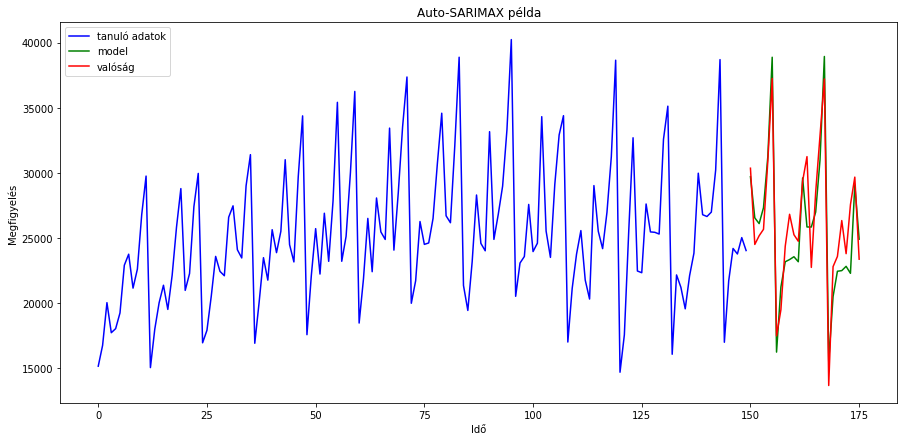

In [20]:
# előrejelzés
model = sm.tsa.statespace.SARIMAX(train,
                          order=(1, 1, 2),
                          seasonal_order=(0, 2, 2, 12),
                          enforce_stationarity=False,
                          enforce_invertibility=False)
# fit model
model_fit = model.fit()
# one step forecast
yhat = model_fit.predict(start=len(train), end=len(y)-1)
# ábra
x = np.arange(y.shape[0])
plt.plot(x[:150], train, c='blue', label="tanuló adatok")
plt.plot(x[150:], yhat, c='green', label="model")
plt.plot(x[150:], test, c="red", label="valóság")
plt.legend()
plt.xlabel("Idő")
plt.ylabel("Megfigyelés")
plt.title("Auto-SARIMAX példa")
plt.show()

# SARIMAX

In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarimax = SARIMAX(y,
                  order=(2,1,1),seasonal_order=(2,0,0,12),
                  exog = y,
                  enforce_stationarity=False, enforce_invertibility=False).fit()
sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  176
Model:             SARIMAX(2, 1, 1)x(2, 0, [], 12)   Log Likelihood                1578.024
Date:                             Fri, 05 Nov 2021   AIC                          -3142.048
Time:                                     10:31:18   BIC                          -3121.021
Sample:                                          0   HQIC                         -3133.505
                                             - 176                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000      0.001    739.027      0.000       0.997       1.003
ar.L1          0.1943   3.25e-10   5.97e+08      0.000       0.194       0.194
ar.L2         -0.2624    2.2e-10  -1.19e+09      0.000      -0.262      -0.262
ma.L1         -0.7846   8.42e-08  -9.31e+06      0.000      -0.785      -0.785
ar.S.L12       0.6251   4.89e-11   1.28e+10      0.000       0.625       0.625
ar.S.L24       0.2684   3.28e-09   8.19e+07      0.000       0.268       0.268
sigma2          1e-10   1.71e-10      0.583      0.560   -2.36e-10    4.36e-10
===================================================================================
Ljung-Box (L1) (Q):                   6.58   Jarque-Bera (JB):                75.14
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.39   Skew:                             0.62
Prob(H) (two-sided):                  0.24   Kurtosis:                         6.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.16e+30. Standard errors may be unstable.
"""

In [11]:
SARIMAX(y, order=(2,1,1),seasonal_order=(2,0,0,12)).loglike([1,0,0,2,3,0,12])

0.0

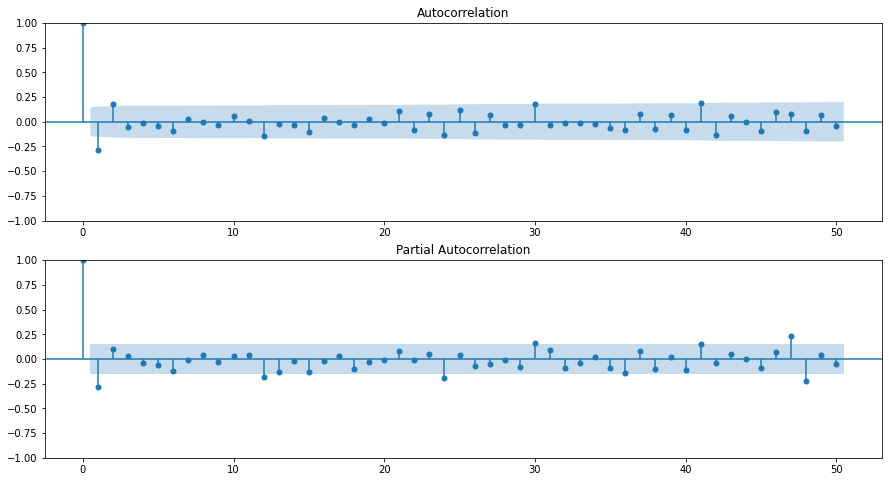

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
res = sarimax.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = plot_acf(res, lags=50, ax=ax[0])
fig = plot_pacf(res, lags=50, ax=ax[1])
plt.show()